<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/pytorch_studying(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 쌓기

In [6]:
import torch
from torch.autograd import Variable
import numpy as np

## 데이터 생성 

In [12]:
def get_data():

    train_X = np.random.randn(20)
    train_Y = np.random.randn(20)

    dtype = torch.FloatTensor

    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad = False).view(20,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad = False)

    return X,y

test = get_data()
print(test)
print(test[0].shape)
print(test[1].shape)

(tensor([[-0.1599],
        [-0.2041],
        [-0.6199],
        [ 0.1220],
        [-0.3534],
        [ 1.5444],
        [ 0.9291],
        [-1.5023],
        [-0.9653],
        [-0.1876],
        [ 0.1164],
        [ 1.3839],
        [-0.1768],
        [ 0.9364],
        [-0.1826],
        [-0.4625],
        [ 0.3891],
        [-1.1793],
        [-1.0154],
        [ 1.1697]]), tensor([ 0.5243, -0.7958, -0.7001,  0.6874,  0.2795, -0.6965, -0.7230, -2.0119,
         0.6912,  1.1973,  0.2543,  0.2034, -0.3825,  1.0598,  0.0315, -0.0917,
         1.5207,  0.4418, -0.9018,  0.4571]))
torch.Size([20, 1])
torch.Size([20])


## 파라미터 생성

In [37]:
def get_weights():

    w=Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.randn(1), requires_grad = True)

    return w,b

## 신경망 모델

전통적인 신경망 모델에서 입출력은 선형 관계임을 가정한다. 이것은 $y=wx+b$로 표현한다.

In [35]:
def simple_network(x):

    y_pred = torch.matmul(x,w)+b 

    return y_pred

## torch.nn으로 데이터 생성 & 파라미터 생성 통합

우리는 앞에서 저수준 함수를 사용해서 각 함수 내에서 신경망이 어떻게 작동하는지에 대해 알아보았다. 이제 고수준 모델을 사용하여 간단히 위 과정을 기술해보자.

In [20]:
import torch.nn as nn

f = nn.Linear(20,1)
print(f)

Linear(in_features=20, out_features=1, bias=True)


## 오차 함수

현재 회귀 문제를 다루고 있으므로 Sum of Squared Error라는 Loss function을 사용한다.  
$L = \sum(y_{pred} - correct_y)^2$

In [39]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data


## 옵티마이저

In [33]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [44]:
x,y = get_data()               # x - 학습 데이터, y - 목적 변수(Target Variables)
w,b = get_weights()           # w,b - 학습 파라미터

i_list = []
losses=[]
for i in range(500):
    y_pred = simple_network(x) # wx + b를 계산하는 함수
    loss = loss_fn(y,y_pred)   # y와 y_pred의 차의 제곱 합을 계산
    
    i_list.append(i)
    losses.append(loss)
    
    if i % 50 == 0: 
        print(loss)

    optimize(learning_rate)    # 오차를 최소화하도록 w, b를 조정

tensor(70.7968)
tensor(51.6758)
tensor(40.5693)
tensor(34.1171)
tensor(30.3678)
tensor(28.1882)
tensor(26.9205)
tensor(26.1825)
tensor(25.7522)
tensor(25.5008)


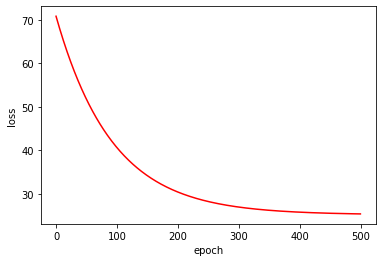

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(i_list,losses,'-r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 신경망 파헤치기

## 2.1 Blocks (Layers)  
  
- Linear Layer 
 > $Y=Wx+b$
- 

### 2.1.1 Linear Layer

In [48]:
from torch.nn import Linear

Layer1 = Linear(in_features=10, out_features =5, bias = True)

크기 10인 텐서 입력 받은 뒤, 5인 텐서 출력. bias 추가.

In [54]:
# 사용 예:  

inp = Variable(torch.randn(1,10))
Layer1(inp)
print(Layer1)
print(Layer1.cuda)
print(Layer1.parameters)
print(Layer1.weight)
print(Layer1.weight.shape)

Linear(in_features=10, out_features=5, bias=True)
<bound method Module.cuda of Linear(in_features=10, out_features=5, bias=True)>
<bound method Module.parameters of Linear(in_features=10, out_features=5, bias=True)>
Parameter containing:
tensor([[-0.2891, -0.1615, -0.2442, -0.1952, -0.1252,  0.2713,  0.2593, -0.3054,
         -0.1433, -0.1948],
        [-0.1331, -0.0972, -0.0185,  0.1576, -0.0515, -0.1693, -0.0229,  0.0881,
          0.0411,  0.0662],
        [ 0.2421,  0.2169, -0.1415, -0.0470, -0.2294, -0.0028,  0.2954,  0.2922,
         -0.0723, -0.2831],
        [ 0.1835, -0.2779,  0.1144,  0.0052,  0.2692,  0.0130, -0.2514,  0.0426,
          0.2861,  0.2243],
        [-0.0841,  0.2876,  0.1353, -0.2905, -0.0188,  0.1384,  0.1645,  0.2591,
          0.2095,  0.2619]], requires_grad=True)
torch.Size([5, 10])


위 같은 선형 레이어는 'Dense Layer', 'Fully Connected Layer'라고도 불린다.

일반적으로, 실무에서 사용할 때 딥러닝 아키텍처는 적어도 2 개 이상의 Layer로 구성된다.

#### 복수의 레이어 구성하는 1st 방법

In [56]:
Layer1 = Linear(10,5)
Layer2 = Linear(5,2)
test = Layer2(Layer1(inp))
print(test) # 10 ---> 2

tensor([[-0.5741, -0.9246]], grad_fn=<AddmmBackward>)


단순히 여러 개의 **선형 레이어**만을 쌓는 것은 학습에 도움이 되지 않는다. 왜냐하면 선형 레이어만 여러 개 쌓은 것은 사실 단 하나의 선형 레이어로 표현될 수 있기 때문이다. 가령, $Y=2(3X)$는 $6(X)$와 동일하다. 즉 2 개의 선형 레이어는 사실 1 개의 선형 레이어로 표현될 수 있다. 이것이 100 개가 있어도 상황은 마찬가지이다. 이러한 탓에 우리는 **비선형함수**가 필요하다.

## 2.2 비선형함수 Activations

- sigmoid  
- tanh  
- ReLU  
- Leaky ReLU

In [61]:
2**3

8

In [88]:


def sigmoid (x):

    f = 1/(1+np.exp(-x))
    return f

def tanh(x):

    f = np.tanh(x)
    return f

def relu(x):

    f = np.maximum(0,x)

    return f

def leaky_relu(x):

    f = np.maximum(0.01*x, x)


    return f

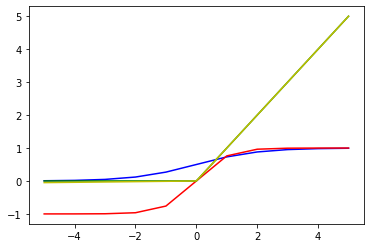

In [91]:
data = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

plt.plot(data, sigmoid(data),'-b')
plt.plot(data, tanh(data),'-r')
plt.plot(data, relu(data),'-g')
plt.plot(data, leaky_relu(data),'-y')
plt.show()


## 2.3 딥러닝 구현하기

- nn.Module 상속  
 - __init__ 메서드 구현  
  > 선형 레이어 같은 레이어들을 초기화  
 - forward 구현
  > init에서 초기화한 것들을 입력하고 최종 출력을 반환

In [93]:
class MyFirstNetwork(nn.Module): #상속

    def __init__(self, input_size, hidden_size, output_size):

        super(MyFirstNetwork,self).__init__() # 이것은 자식 클래스를 위의 부모 클래스(nn.Module)로 전달
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def foward(self, input):

        out = self.layer1(input)
        out = nn.ReLU(out)
        out = self.layer2(out)

        return out
        

# References  
[1] Pytorch로 시작하는 딥러닝, 에이콘